# **Laboratorio 1:** Introducción a Colab, OpenCV y Numpy
**Programa:** [Bootcamp en Visión Artificial para los ODS](https://github.com/EdwinTSalcedo/Bootcamp-Computer-Vision-for-the-SDGs) - **Autor:** [Edwin Salcedo](https://github.com/EdwinTSalcedo)

En este laboratorio verás lo básico de Colab, OpenCV, y Numpy. Estas herramientas son la base para crear algoritmos de procesamiento de imágenes y visión artificial. En las siguientes secciones, veremos una introducción mejor explicada a cada una de estas herramientas. 



# 1. Colab

La primera herramienta, Colab, sirve para programar Jupyter Notebooks en la nube, lo cual es bastante útil cuando uno no cuenta con recursos de hardware locales requeridos para programar algoritmos de visión artificial.

Para aquellos que no trabajaron nunca con Jupyter Notebooks: Básicamente, esta herramienta consiste en un documento que permite escribir, documentar y ejecutar código, visualizar datos, realizar cálculos y ver los resultados en múltiples celdas que pueden contener código en Python o texto. 

La extensión de un notebook es `.ipynb` y la plataforma Colab hace muy sencillo guardar estos archivos en la nube (Gdrive). El boton `+ Code`, ubicado en la parte inferior de cada celda, te permitirá crear una nueva celda para código en Python. Por otro lado, `+ Text` te permitirá crear una celda de texto en el cual podrás agregar descripciones y textos como en la presente celda.

Ademas, puedes visitar el siguiente link __[The Colab Base Tutorial](https://colab.research.google.com/notebooks/intro.ipynb)__ si quieres ver más funcionalidades y ejemplos con Colab.

## 1.1 Importar librerias
Como en cualquier lenguaje de programación, las librerías en Python son colecciones de funciones y recursos que nos permiten enfocarnos en las tareas importantes, en lugar de invertir tiempo en reinventar la rueda. Las siguientes librerías son algunas de las librerías que veremos en el Bootcamp.

In [ ]:
# Numpy es la librería principal para el procesamiento de imágenes. 
# Especificamente, Numpy proporciona un objeto de matriz multidimensional denominado 
# nd.array, el cual brinda alto rendimiento y eficiencia al aplicar metodos de procesamiento.
# Por ejemplo, si una lista bidimensional tomara 20 MB en Python, 
# un array NumPy con los mismos datos cabría en 4 MB.
import numpy as np

# Matplotlib es un módulo básico para mostrar imágenes y gráficos. Usualmente, 
# usaremos su modulo pyplt para mostrar gráficos en la plataforma Colab.
# La siguiente linea, %matplotlib inline, permite que los notebooks en Colab 
# muestren imágenes. Aunque esto era un problema en anteriores versiones de Colab, 
# actualmente es posible no usar esta linea y obtener buenos resultados.
import matplotlib.pyplot as plt
%matplotlib inline

# El módulo mpimg es una de las muchas formas de importar imágenes en notebooks
# A veces utilizaremos mpimg y otras veces las funciones de matplotlib u OpenCV.
import matplotlib.image as mpimg

# OpenCV (Open Computer Vision) es la librería principal para el trabajo con 
# visión artificial. La versión original fue implementada en C/C++. Posteriormente, 
# la librería fue integrada en los lenguajes de programación mas conocidos. Por ejemplo, 
# Java, C++, y Python. La siguiente linea permite importar OpenCV en Python. 
import cv2 

# La librería requests nos permite realizar peticiones web (GET, POST, PUT, DELETE), 
# lo que significa que nos permitirá extraer datos/imágenes desde sitios web y
# procesarlos en el script de Python local.
import requests

# Shutil nos permite procesar archivos localmente (moverlos, copiarlos, eliminarlos, 
# entre otras funciones).
import shutil

# google.colab.files contiene una conjunto de funciones que nos permiten interactuar con
# archivos internos/externos a Colab
# google.colab.drive proporciona un método de conexión a los archivos de una cuenta en Google Drive.
from google.colab import files, drive

# Este módulo contiene herramientas para crear, escribir y leer archivos zip.
import zipfile

# TensorFlow es una librería de software gratuita y de código abierto para el aprendizaje automático.
# Se puede utilizar en una variedad de tareas, pero tiene un enfoque particular en la entrenamiento
# y despliegue de redes neuronales profundas. 
import tensorflow as tf

## 1.2 Importar imágenes en Colab
Actualmente existen muchas librerías para cargar y mostrar imágenes en scripts y notebooks de Python, sin embargo, matplotlib y opencv serán los metodos mas utilizados en nuestros ejercicios en Colab. Usaremos ambas librerías frecuentemente y exploráremos otros metodos en futuros laboratorios. 


### 1.2.1 Cargar una imagen y mostrarla en un notebook con mpimg

In [ ]:
# Sube una imagen desde tu computadora hacia el sistema operativo de Colab
# Puedes revisar todos los archivos subidos dentro de la opción "Files" en tu menú de la izquierda.
uploaded = files.upload()

Saving pumakatari.jpeg to pumakatari.jpeg


<class 'numpy.ndarray'>


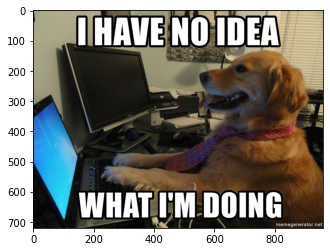

In [ ]:
# Una vez cargada tu imagen, necesitaras importarla dentro de este notebook.
# por lo que en esta ocasión usaremos mpimg para realizar esta tarea. 
image = mpimg.imread('ihavenoidea.jpeg')

# Imprime el tipo de variable de la imagen importada
print(type(image))

# Muestra la imagen
plt.imshow(image)

### 1.2.2 Cargar una imagen y mostrarla en un notebook con OpenCV

<class 'numpy.ndarray'>


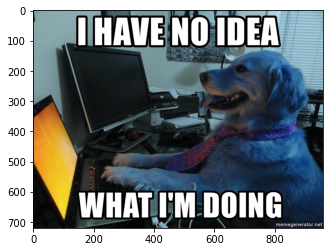

In [ ]:
# uploaded = files.upload() 

image2 = cv2.imread('ihavenoidea.jpeg') 

# Imprime el tipo de variable de la imagen importada 
print(type(image2))

# Muestra la imagen
plt.imshow(image2)

# Como resultado, veras una imagen con colores invertidos. Esto se debe a que 
# la función imread de OpenCV importa imágenes en formato BGR. El formato BGR 
# considera que los canales de una imagen están en un orden distinto (primero 
# Azul B, luego Verde G, y finalmente Rojo R) por defecto, sin embargo, 
# siempre debemos apuntar a usar el formato RGB.

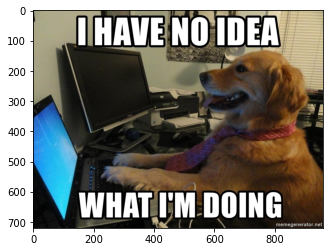

In [ ]:
# Por lo tanto, necesitamos convertir la imagen a RGB. 
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

plt.imshow(image2)

Ademas debemos notar que `print(type(image))` muestra que ambas imagenes son del tipo `<class 'numpy.ndarray'>`. Una gran mayoria de librerias, incluyendo OpenCV y Matplotlib, registran los datos de imágenes en arrays de NumPy. La estructura usual tiene el siguiente formato `[Height, Width, Channel]`, donde *height* representa la altura, *width* la anchura, y *Channel* a los canales de la imagen. Aunque estos últimos son 3 en las imagenes a color, esta dimensión desaparece en las imagenes a escala de grises. 

In [ ]:
print(image2.shape)

(720, 960, 3)


## 1.3 Funciones adicionales de Colab

### 1.3.1 Guardar y comprimir imágenes

Una vez termines el procesamiento de imágenes, es probable que quieras descargar estos en tu equipo local. Para esto, puedes hacer click izquierdo sobre el archivo en la sección `Files` (la sección que esta a la izquierda de esta columna y que tiene un icono de carpeta), y presionar `Download`. Por otra parte, también puedes seguir la siguiente secuencia de instrucciones para comprimir una o mas imágenes en un archivo `.zip`.  

In [ ]:
# Mover la imagen a la carpeta de Drive
!mkdir Drive
!mv ihavenoidea.jpeg Drive/ihavenoidea.jpeg

Crear un archivo zip de tu carpeta de Drive

In [ ]:
# Puedes ver más opciones de compresión con Shutil
# https://docs.python.org/2/library/shutil.html#shutil.make_archive
shutil.make_archive("Drive", 'zip', "/content","/content/Drive")

'/content/Drive.zip'

Descarga de datos desde Colab

In [ ]:
files.download('Drive.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 1.3.2 Vincular una cuenta GDrive para obtener almacenamiento adicional
Dado que ya tienes una cuenta de Gmail con +15Gb de almacenamiento, no sería una mala idea guardar tus sets de imágenes en tu cuenta de GDrive personal. Colab tiene varias formas para integrar una cuenta de GDrive en un notebook en Colab. El siguiente ejemplo muestra una de estas estas formas. 


In [ ]:
# Montar Gdrive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Este comando solicitara un código de verificación, el cual debe copiarse desde el link provisto: 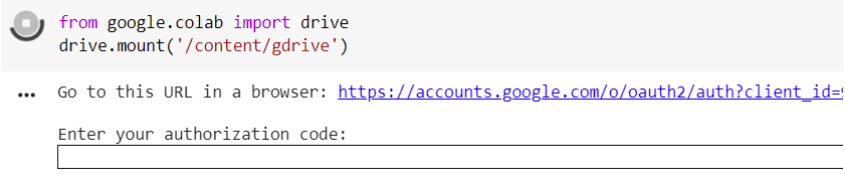

Por lo tanto, debes acceder al URL, copiar el código, e insertar el mismo en el campo provisto. Aunque este código caduca en poco tiempo, deberas tener cuidado con compartirlo, como con cualquier contraseña.

Una vez montada tu cuenta de GDrive, podrás acceder libremente a tus carpetas o archivos personales en esta plataforma a través del menú izquierdo y a través de comandos de Linux, por ejemplo: 

In [ ]:
# Listar archivos en la carpeta actual
%cd .. 
%ls

/content
common.py  Drive.zip                 my_array.npy  noidea.jpg
Drive/     ihavenoidea_modified.jpg  myfile.csv    sample_data/


### 1.3.3 Ejecutar comandos Bash

Después de ver la última celda, notaras que puedes ejecutar comandos bash (comandos basados ​​en el sistema Linux) desde una celda de código. Esto es posible iniciando un comando con el símbolo `!`. Por ejemplo, para descargar una librería:

`!apt-get install library`

La ejecución de un comando que inicie con el símbolo `!` tendrá efectos en la celda donde se ejecute. Sin embargo, también puedes utilizar el símbolo % para que este tenga un efecto en el notebook completo. 

### 1.3.4 Activar GPU y TPU
Normalmente, Colab asigna CPU y RAM en cada conexión de forma predeterminada. Sin embargo, en los futuros notebooks notarás que los algoritmos de procesamiento de imágenes y visión por computadora exigirán mas recursos de hardware, por lo que tendremos que utilizar la GPU para compensar esto. Ten en cuenta que la GPU solo está disponible durante 12 horas desde su activación, por lo que deberás tomar esto en cuenta cuando ejecutes algoritmos durante mucho tiempo. Debes seguir los siguientes pasos para activar la GPU en un notebook:

Click en: "Runtime" → "Change Runtime type" → "Hardware Accelerator". Finalmente, puedes seleccionar el hardware deseado.

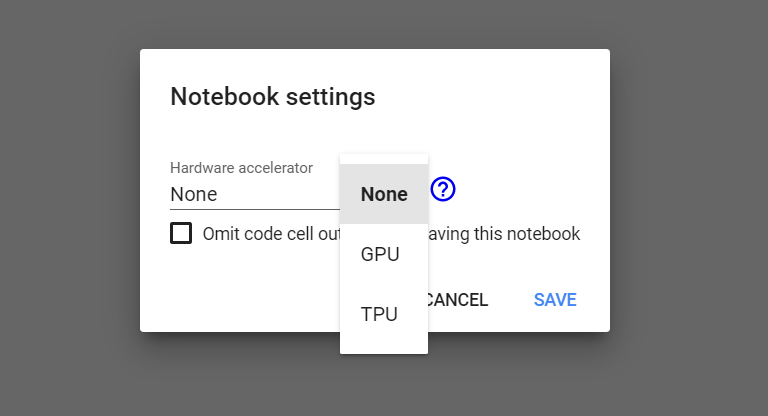



Puedes verificar fácilmente si la GPU se encuentra habilitada ejecutando el siguiente comando:

In [ ]:
tf.test.gpu_device_name()

''

# 2. OpenCV

Como se menciono anteriormente, OpenCV es la libreria principal para trabajar con procesamiento de imagenes y visión por computadora. OpenCV es de código abierto y juega un papel importante en la actualidad. Al usarlo, uno puede procesar imágenes y videos para identificar objetos, rostros o incluso la escritura a mano de una persona. Cuando se integra con varias librerias, como NumPy, Python es capaz de procesar la estructura de matriz *nd.array* de OpenCV para su análisis y procesamiento.



## 2.1 Mostrar una imagen

2073600
(720, 960, 3)
uint8


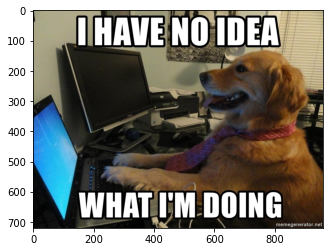

In [ ]:
# Para importar OpenCV, solamente tenemos que ejecutar la siguiente instrucción
import cv2
import matplotlib.pyplot as plt

input_image=cv2.imread('ihavenoidea.jpeg')
input_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)

# Veamos algunas propiedades de la imagen
print(input_image.size)
print(input_image.shape)
print(input_image.dtype)

# Mostrar la imagen
plt.imshow(input_image)

# 2.2 Trabajando en el espacio de colores RGB
Las imágenes generalmente se guardan en el formato RGB. Entonces, puedes pensar en las imágenes como cubos 3D, con valores como ancho, alto y profundidad. Para explorar esta idea, separaremos y visualizaremos los canales de una imagen:

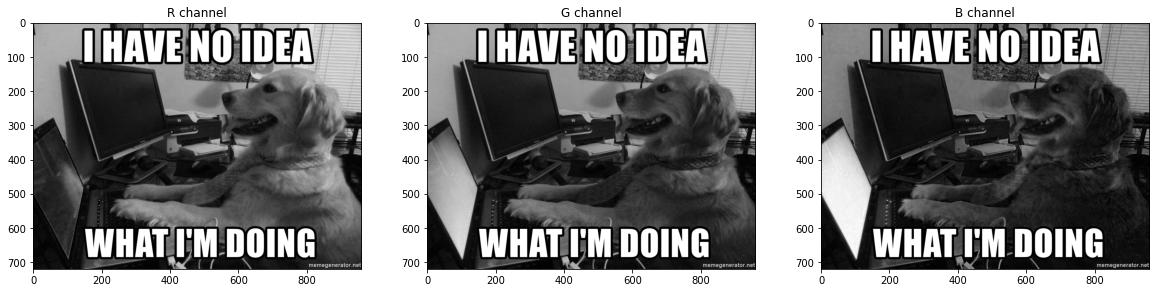

In [ ]:
# Aislar canales RGB
r,g,b = cv2.split(input_image)

# Visualizar los canales de color individualmente
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10)) 
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

## 2.3 Obtención y definición de datos de imagen

Una imagen cargada con OpenCV es un matriz Numpy. Las matrices Numpy están optimizadas para la implementación de operaciones de matriz y, por lo tanto, existen métodos rápidos para realizar cálculos de matrices. Por lo tanto, generalmente es una mala práctica acceder a píxeles individuales, pero se puede hacerlo de ser necesario.

In [ ]:
# Acceder a un pixel
pixel = input_image[100,100]
print(pixel)

[171 161 134]


[0 0 0]


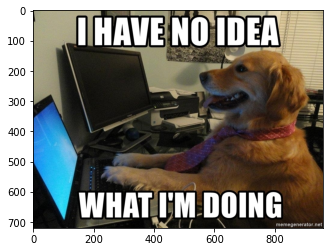

In [ ]:
# Definir el valor de un pixel
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print(pixelnew)

plt.imshow(input_image)

## 2.4. Obtención y definición de regiones de una imagen

De la misma manera en que podemos obtener o establecer píxeles individualmente, también podemos obtener o establecer regiones de una imagen. Esta es una forma particularmente útil de trabajar en una región de interés.

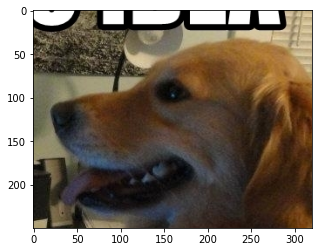

In [ ]:
dogface = input_image[100:350, 530:850]
plt.imshow(dogface)

250
320


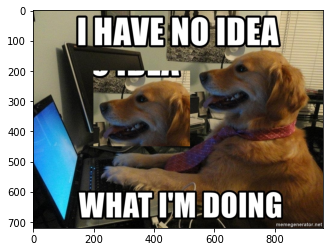

In [ ]:
# Reemplazar una región de la imagen
fresh_image=cv2.imread('ihavenoidea.jpeg') 
fresh_image = cv2.cvtColor(fresh_image,cv2.COLOR_BGR2RGB)
                            
fresh_image[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface
print(dogface.shape[0])
print(dogface.shape[1])
plt.imshow(fresh_image)

## 2.5 Funciones básicas de OpenCV

OpenCV proporciona herramientas para procesar y analizar el contenido de las imágenes, incluido el reconocimiento de objetos en fotografías digitales (como caras y figuras de personas, texto, etc.), el seguimiento del movimiento de objetos, la conversión de imágenes, o incluso la aplicación de métodos de machine learning. En esta ocasión, veremos los metodos mas basicos. 

### 2.5.1 Cambiar el tamaño de la imagen

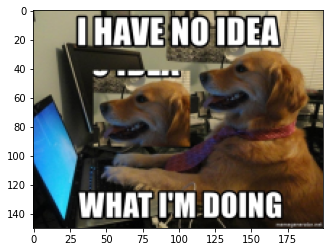

In [ ]:
import numpy as np

# Copiar el contenido de una imagen
new_image = np.copy(fresh_image)

# Cambiar el tamaño de la imagen
new_image = cv2.resize(new_image, (200,150), interpolation = cv2.INTER_AREA)

plt.imshow(new_image)

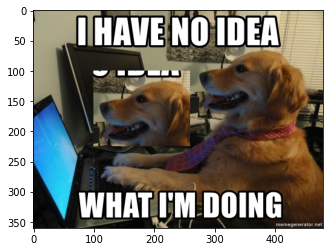

In [ ]:
# Esta función también permite definir porcentajes con respecto a los tamaños
new_image = np.copy(fresh_image)
new_image2 = cv2.resize(new_image, (0,0), fx=0.5,fy=0.5)
plt.imshow(new_image2)

### 2.5.2 Rotar una imagen

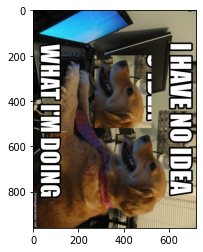

In [ ]:
new_image = np.copy(fresh_image)
image2 = cv2.rotate(new_image, cv2.cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image2)

## 2.5 Guardar una imagen



In [ ]:
cv2.imwrite("ihavenoidea_modified.jpg", cv2.cvtColor(fresh_image, cv2.COLOR_RGB2BGR))

True

# 3. Numpy

Esta será breve introducción a Numpy, centrado en la estructura básica de datos, los *ndarrays*. Numpy es el paquete científico más importante en el ecosistema de Python ya que este provee una estructura de datos común en el cual otros paquetes están basados.

<img src='https://drive.google.com/uc?id=1lCxtr6AHg2h0-S4phI2T94131H5Lir5m' width='70%'>

Numpy ofrece una gran alternativa a las listas comunes de Python; por ejemplo, los arreglos de Numpy son más compactos, estos permiten un acceso más rápido en la lectura y escritura de elementos. Como se describe arriba, una lista puede tomar 20 MB para registrar una imagen, mientras que un arreglo de Numpy requeriría solamente 4 MB. Esto es bastante útil desde que las imágenes son colocadas en grandes matrices. 

In [ ]:
# Comúnmente importamos numpy como np en Python
import numpy as np

## 3.1 Creando arreglos

El arreglo o `numpy.ndarray` es la contribución más grande de numpy. Un arreglo es una cuadrícula regular de N-dimensiones homogénea por defecto (todos los elementos tienen el mismo tipo), bloque continuo de memoria. Puedes ver 3 ejemplos en la siguiente imagen.

<img src='https://drive.google.com/uc?id=1zNfxs9J6mT9wAYoOyP4fcmMBrjiCCUmQ' width='70%'>

Ref. https://indianaiproduction.com/python-numpy-array/ 
 
Aunque hay muchos tipos de datos de ndarray (8-bit ints, 32 bit floats, 64-bit longs, string, bool), las imágenes se guardan en tipos `int` con regularidad.

In [ ]:
# Construye un arreglo 2D
a = np.array([
    [1.2, 2.3, 4.0],
    [1.2, 3.4, 5.2],
    [0.0, 1.0, 1.3],
    [0.0, 1.0, 2e-1]],dtype=float)
print(a)

[[1.2 2.3 4. ]
 [1.2 3.4 5.2]
 [0.  1.  1.3]
 [0.  1.  0.2]]


In [ ]:
# Funciones útiles para crear arreglos
b = np.zeros((3,4),dtype=np.int) # Crea un arreglo de ceros
c = np.ones((2,3,4),dtype=np.int) # Crea un arreglo de unos
d = np.full((2,2),7) # Crea un arreglo constante
e = np.eye(5) # Crea una matriz identidad 5x5
f = np.random.randint((3,3)) # Crea un arreglo con valores random

print("zeros: ",b)
print("ones: ",c)
print("constant array: ",d)
print("identity matrix: ", e)
print("random array: ", f)

zeros:  [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
ones:  [[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]
constant array:  [[7 7]
 [7 7]]
identity matrix:  [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
random array:  [[4 5 0]
 [0 1 2]
 [2 1 3]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

## 3.2 Inspeccionando y guardando arreglos

In [ ]:
# Inspecciona las propiedades en un arreglo
print(a.dtype) # tipo de datos de los elementos de la matriz
print(a.ndim) # número de dimensiones de un arreglo
print(a.shape) # dimensiones de un arreglo
print(len(a)) # largo de un arreglo
print(a.size) # Numero de elementos de un arreglo

# Convertir un arreglo a un tipo diferente
g = a.astype(int) 
print(g.dtype)

float64
2
(4, 3)
4
12
int64


In [ ]:
# Guardar en el disco
np.save("my_array",a)
!ls

my_array.npy  sample_data


In [ ]:
# Cargar un arreglo del disco
np.load('my_array.npy')

array([[1.2, 2.3, 4. ],
       [1.2, 3.4, 5.2],
       [0. , 1. , 1.3],
       [0. , 1. , 0.2]])

In [ ]:
# Guardar y cargar archivos de texto

np.savetxt('myfile.txt',a,delimiter=',') # save csv
# !ls

# m = np.loadtxt('myfile.txt',delimiter=',') # load txt
np.genfromtxt('myfile.csv',delimiter=',') # load csv

## 5.3 Aritmética y operaciones lógicas

In [ ]:
arrA = np.array([
    [1.2, 2.3, 4.0],
    [1.2, 3.4, 5.2],
    [0.0, 1.0, 1.3],
    [0.0, 1.0, 2e-1]])
print(arrA)

# Operaciones básicas con un arreglo y un valor constante
arrA += 2.5
print(arrA)

arrA -= 2.5
print(arrA)

arrA /= 2.5
print(arrA)

arrA *= 2.5
print(arrA)

[[1.2 2.3 4. ]
 [1.2 3.4 5.2]
 [0.  1.  1.3]
 [0.  1.  0.2]]
[[3.7 4.8 6.5]
 [3.7 5.9 7.7]
 [2.5 3.5 3.8]
 [2.5 3.5 2.7]]
[[1.2 2.3 4. ]
 [1.2 3.4 5.2]
 [0.  1.  1.3]
 [0.  1.  0.2]]
[[0.48 0.92 1.6 ]
 [0.48 1.36 2.08]
 [0.   0.4  0.52]
 [0.   0.4  0.08]]
[[1.2 2.3 4. ]
 [1.2 3.4 5.2]
 [0.  1.  1.3]
 [0.  1.  0.2]]


In [ ]:
# Operaciones básicas entre dos arreglos
arrB = a.astype(int)
arrC = np.array([
    [3, 5, 1],
    [4, 2, 2],
    [3, 1, 0],
    [5, 2, 1]])

print(arrC-arrB)
print(arrC+arrB)
print(arrC*arrB)
print(arrC/arrB)

# Funciones adicionales para operaciones aritméticas entre arreglos
np.subtract(arrC,arrB)
np.add(arrC,arrB)
np.multiply(arrC,arrB)
np.divide(arrC,arrB)

[[ 2  3 -3]
 [ 3 -1 -3]
 [ 3  0 -1]
 [ 5  1  1]]
[[4 7 5]
 [5 5 7]
 [3 2 1]
 [5 3 1]]
[[ 3 10  4]
 [ 4  6 10]
 [ 0  1  0]
 [ 0  2  0]]
[[3.         2.5        0.25      ]
 [4.         0.66666667 0.4       ]
 [       inf 1.         0.        ]
 [       inf 2.                inf]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


array([[3.        , 2.5       , 0.25      ],
       [4.        , 0.66666667, 0.4       ],
       [       inf, 1.        , 0.        ],
       [       inf, 2.        ,        inf]])

In [ ]:
# Operaciones lógicas
print(arrB == arrC)
print(arrB > arrC)

[[False False False]
 [False False False]
 [False  True False]
 [False False False]]
[[False False  True]
 [False  True  True]
 [False False  True]
 [False False False]]


## 5.4 Subconjuntos, rebanado, indexación, combinación, división de matrices

In [ ]:
print(arrB)

arrB[2] # seleccione el elemento en el 2nd index

[[1 2 4]
 [1 3 5]
 [0 1 1]
 [0 1 0]]


array([0, 1, 1])

In [ ]:
arrB[2,1]=15
print(arrB)

[[ 1  2  4]
 [ 1  3  5]
 [ 0 15  1]
 [ 0  1  0]]


In [ ]:
arrB[1,2] # seleccione el elemento en la fila 1 columna 2 (equivalente a arrb[1][2])

5

In [ ]:
arrB[0:2,1] # seleccione elementos en las filas 0 y 1 en la columna 1

array([2, 3])

In [ ]:
arrB[:1] # seleccione todos los elementos en la fila 0

array([[1, 2, 4]])

In [ ]:
arrB[:,2] # seleccione todos los elementos en la columna 2

array([4, 5, 1, 0])

In [ ]:
# Concatenar arreglos
arrD = np.concatenate((arrB, arrC),axis=0)
print(arrD)

[[ 1  2  4]
 [ 1  3  5]
 [ 0 15  1]
 [ 0  1  0]
 [ 3  5  1]
 [ 4  2  2]
 [ 3  1  0]
 [ 5  2  1]]


In [ ]:
# Apilar arreglos verticalmente
arrE = np.vstack((arrB, arrC))
print(arrE)

# Apilar arreglos horizontalmente
arrF = np.hstack((arrB, arrC))
print(arrF)

[[ 1  2  4]
 [ 1  3  5]
 [ 0 15  1]
 [ 0  1  0]
 [ 3  5  1]
 [ 4  2  2]
 [ 3  1  0]
 [ 5  2  1]]
[[ 1  2  4  3  5  1]
 [ 1  3  5  4  2  2]
 [ 0 15  1  3  1  0]
 [ 0  1  0  5  2  1]]


In [ ]:
# División de arreglos
np.hsplit(arrB, 3) # Divida el arreglo horizontalmente en el tercer índice

[array([[1],
        [1],
        [0],
        [0]]), array([[ 2],
        [ 3],
        [15],
        [ 1]]), array([[4],
        [5],
        [1],
        [0]])]

In [ ]:
np.vsplit(arrB, 2) # Divida el arreglo verticalmente en el segundo índice

[array([[1, 2, 4],
        [1, 3, 5]]), array([[ 0, 15,  1],
        [ 0,  1,  0]])]

# Ejercicio 1: Imágenes como Datos Numéricos
Este ejercicio requiere que investigues los métodos Numpy para implementar los siguientes pasos con una imagen de tu preferencia:

1. Leer y mostrar una imagen en escala de grises. Pista: Puedes utilizar la función cv2.cvtColor para cambiar de un color a otro.  
2. Imprimir las dimensiones de una imagen
3. Imprimir el valor del píxel con coordenadas x= 234 y y= 55
4. Encontrar los píxeles más oscuros y más claros de la imagen.
5. Finalmente, crear una imagen de 8x8 píxeles en escala de grises creando su propio array de Numpy.



# Ejercicio 2: Manipular una imagen RGB
Intenta importar y analizar las diferencias de cada canal usando una imagen con grandes secciones de rojo, verde y azul.

Escribe tus conclusiones después de separar los canales: ¿Qué área tiene el valor más bajo para el rojo? ¿Qué tal para el azul?

# Ejercicio 3: Numpy 

Resuelva los siguientes ejercicios en celdas separadas.

1. Dado dos arreglos de dimensiones 3,2,5 y valores random encuentre las posiciones donde coinciden los elementos de ambas matrices.
2. Dadas tres imágenes de paisajes de La Paz, apílalas todas horizontalmente.
3. Dada una imagen en escala de grises con muchos, seleccione un rostro y elimine todas las secciones innecesarias.
4. Dada una imagen en escala de grises, encuentre el valor de píxel que más se repite.
5. Obtenga la versión reflejada de una imagen en escala de grises. La imagen se puede reflejar horizontal o verticalmente.
